# Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import fsolve
from numpy import linalg

In [2]:
pi = np.pi

In [3]:
%matplotlib inline 

# Réaction de Robertson

In [4]:
def F(Z, t) :
    res=np.zeros(3)
    res[0] = -k1*Z[0] + k3*Z[1]*Z[2]
    res[1] = k1*Z[0]-k3*Z[1]*Z[2]-k2*(Z[1])**2
    res[2] = k2*(Z[1])**2
    return res

Constants :

In [5]:
k1 = 0.04
k2 = 3*1e7
k3 = 1e3

In [6]:
k3

1000.0

In [7]:
T0 = 0.
Tf = 60.

In [8]:
init_cont = [1.,0.,0.]

# Méthode d'Adame Bashforth d'ordre 3

In [139]:
dt_AB3 = 1e-4
niter_AB3 = int(Tf/dt_AB3)

In [140]:
Z_AB = np.zeros([3,niter_AB3])
Z_AB[:,0] = init_cont

RK2 for 1st two iterations :

In [141]:
for i in [0,1]:
    t = i*dt_AB3
    Z_inter = Z_AB[:,i]+dt_AB3*F(Z_AB[:,i],t)
    Z_AB[:,i+1] = Z_AB[:,i]+dt_AB3*0.5*(F(Z_inter,t)+F(Z_AB[:,i],t))

In [142]:
for i in range(2,niter_AB3-1) :
    t = i*dt_AB3
    Z_AB[:,i+1] = Z_AB[:,i] + dt_AB3/12*(23.*F(Z_AB[:,i], t) - 16.*F(Z_AB[:,i-1], t) + 5.*F(Z_AB[:,i-2], t))

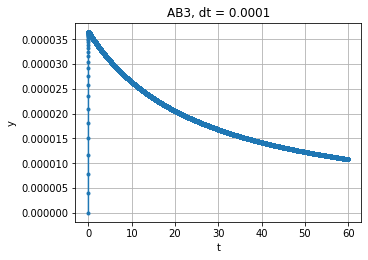

In [143]:
fig, ax = plt.subplots(nrows=1, ncols=1, constrained_layout=True,figsize=(5,3.5))
x_AB3=np.linspace(0,Tf,niter_AB3)
#ax.plot(x_AB3,Z_AB[0,:], '.-', label=r'$y_a$')
ax.plot(x_AB3,Z_AB[1,:], '.-', label=r'$y_b$')
#ax.plot(x_AB3,Z_AB[2,:], '.-', label=r'$y_c$')
ax.set(title='AB3, dt = %2.2g'%dt_AB3, xlabel='t', ylabel='y', yscale='linear'); ax.grid()
#ax.legend()
plt.show()

# Méthode de RK4

In [29]:
dt_RK4 = 1e-3
niter_RK4 = int(Tf/dt_RK4)

In [30]:
Z_RK4 = np.zeros([3,niter_RK4])
Z_RK4[:,0] = init_cont

In [31]:
for i in range(niter_RK4-1) :
    t = i*dt_RK4
    rk1 = dt_RK4*F(Z_RK4[:,i],t)
    rk2 = dt_RK4*F(Z_RK4[:,i] + 0.5*rk1,t)
    rk3 = dt_RK4*F(Z_RK4[:,i] + 0.5*rk2,t)
    rk4 = dt_RK4*F(Z_RK4[:,i] + rk3,t)
    Z_RK4[:,i+1] = Z_RK4[:,i] + 1./6.*(rk1 + 2.*rk2 + 2.*rk3 + rk4 )

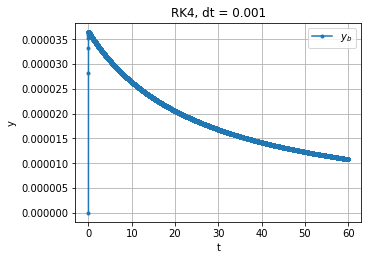

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=1, constrained_layout=True,figsize=(5,3.5))
x_RK4=np.linspace(0,Tf,niter_RK4)
#ax.plot(x_RK4,Z_RK4[0,:], '.-', label=r'$y_a$')
ax.plot(x_RK4,Z_RK4[1,:], '.-', label=r'$y_b$')
#ax.plot(x_RK4,Z_RK4[2,:], '.-', label=r'$y_c$')
ax.set(title='RK4, dt = %2.2g'%dt_RK4, xlabel='t', ylabel='y', yscale='linear'); ax.grid()
ax.legend()
plt.show()

# Méthode odeint de scipy

In [33]:
dt_odeint = 1e-2
t_ode = np.linspace(0,Tf,int(Tf/dt_odeint))

In [34]:
z_ode=odeint(F,init_cont,t_ode)

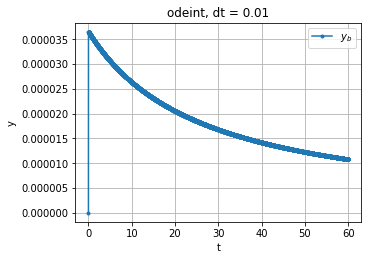

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=1, constrained_layout=True,figsize=(5,3.5))
#ax.plot(t_ode,z_ode[:,0], '.-', label=r'$y_a$')
ax.plot(t_ode,z_ode[:,1], '.-', label=r'$y_b$')
#ax.plot(t_ode,z_ode[:,2], '.-', label=r'$y_c$')
ax.set(title='odeint, dt = %2.2g'%dt_odeint, xlabel='t', ylabel='y', yscale='linear'); ax.grid()
ax.legend()
plt.show()

# Euler implicite

In [268]:
def f_impli(Z,Zold):
    return Z - dt_imp*F(Z,t) - Zold

def jac_impli(Z,Zold):
    J = np.zeros([3,3])
    J[0,0] = 1.+k1*dt_imp
    J[0,1] = -dt_imp*k3*Z[2]
    J[0,2] = -dt_imp*k3*Z[1]
    J[1,0] = -dt_imp*k1
    J[1,1] = 1.+dt_imp*(k3*Z[2]+2.*k2*Z[1])
    J[1,2] = dt_imp*k3*Z[1]
    J[2,0] = 0.
    J[2,1] = -2.*dt_imp*k2*Z[1]
    J[2,2] = 0.
    return J

In [269]:
dt_imp = 1e-3
niter_imp = int(Tf/dt_imp)

In [270]:
z_imp=np.zeros([3,niter_imp])
z_imp[:,0] = init_cont

In [289]:
for i in range(niter_imp-1):
    t = i*dt_imp
    #z_imp[:,i+1]=fsolve(f_impli,[0.7,0.1,0.1],args=z_imp[:,i],fprime=jac_impli)
    z_imp[:,i+1]=fsolve(f_impli,[0.7,0.7,0.7],args=z_imp[:,i])

In [290]:
# for i in range(niter_imp-1):
#     I=[0.7,0.1,0.1]
#     residu=1
#     niter=1
#     #matrix=np.linalg.inv(jac_impli(I,Implicit[:,i]))
#     while ((residu >1E-14) and (niter<10000)):
#         niter=niter+1
#         matrix=np.linalg.inv(jac_impli(I,z_imp[:,i]))
#         I=I-np.dot(matrix,f_impli(I,z_imp[:,i]))
#         residu=np.linalg.norm(f_impli(I,z_imp[:,i]))
#     z_imp[:,i+1] = I

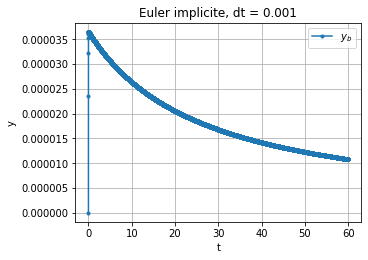

In [291]:
fig, ax = plt.subplots(nrows=1, ncols=1, constrained_layout=True,figsize=(5,3.5))
x_imp=np.linspace(0,Tf,niter_imp)
#ax.plot(x_imp,z_imp[0,:], '.-', label=r'$y_a$')
ax.plot(x_imp,z_imp[1,:], '.-', label=r'$y_b$')
#ax.plot(x_imp,z_imp[2,:], '.-', label=r'$y_c$')
ax.set(title='Euler implicite, dt = %2.2g'%dt_imp, xlabel='t', ylabel='y', yscale='linear'); ax.grid()
ax.legend()
plt.show()

# Euler explicite

In [263]:
dt_exp = 1e-4
niter_exp = int(Tf/dt_exp)

In [264]:
z_exp=np.zeros([3,niter_exp])
z_exp[:,0] = init_cont

In [265]:
for i in range(niter_exp-1):
    t = i*dt_imp
    z_exp[:,i+1]=z_exp[:,i] + dt_exp*F(z_exp[:,i], t)

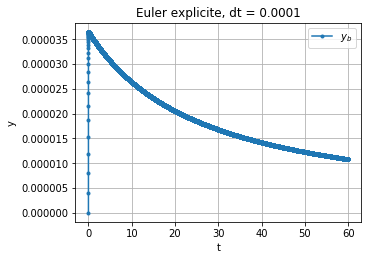

In [266]:
fig, ax = plt.subplots(nrows=1, ncols=1, constrained_layout=True,figsize=(5,3.5))
x_exp=np.linspace(0,Tf,niter_exp)
#ax.plot(x_exp,z_exp[0,:], '.-', label=r'$y_a$')
ax.plot(x_exp,z_exp[1,:], '.-', label=r'$y_b$')
#ax.plot(x_exp,z_exp[2,:], '.-', label=r'$y_c$')
ax.set(title='Euler explicite, dt = %2.2g'%dt_exp, xlabel='t', ylabel='y', yscale='linear'); ax.grid()
ax.legend()
plt.show()

# Comparison

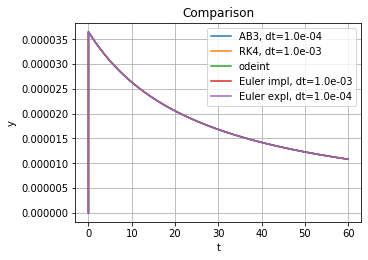

In [267]:
fig, ax = plt.subplots(nrows=1, ncols=1, constrained_layout=True,figsize=(5,3.5))
ax.plot(x_AB3,Z_AB[1,:], '-', label='AB3, dt=%2.1e' %dt_AB3)
ax.plot(x_RK4,Z_RK4[1,:], '-', label='RK4, dt=%2.1e' %dt_RK4)
ax.plot(t_ode,z_ode[:,1], '-', label='odeint')
ax.plot(x_imp,z_imp[1,:], '-', label='Euler impl, dt=%2.1e' %dt_imp)
ax.plot(x_exp,z_exp[1,:], '-', label='Euler expl, dt=%2.1e' %dt_exp)
ax.set(title='Comparison', xlabel='t', ylabel='y', yscale='linear'); ax.grid()
ax.legend()
plt.show()